# Laporan Proyek Machine Learning - I Kadek Adi Memes Subagia


# Domain Proyek
 <h1>Analisa Pergerakan Harga Bitcoin</h1>

 <p>Bitcoin atau yang biasa kita kenal dengan BTC adalah salah satu mata uang digital atau yang kita kenal dengan cryptocurrency, hal ini menjadi sangat tren dan banyak sekali orang -orang yang mulai menaruh sebagian penghasilannya kedalam cryptocurrency. terutama pada Bitcoin ini karena Bitcoin menduduki Top 1 cryptocurrency dengan harga market tertinggi. bisa dilihat pada website <a href ="https://coinmarketcap.com/id/">Coinmarketcap</a></p> <br>
 Kenapa saya mengambil permasalahan ini adalah karena ini sedang panas - panasnya di indonesia, dimana banyak konten kreator yang sudah mengedukasi kita untuk mulai investasi pada coin inii, tapii kita sebagai individu tidak boleh asal percaya dengan ajakan konten kreator yang mengajak menaruh uang kita pada Bitcoin sebelum kita tahu apa itu Bitcoin?? dan apa aja sihh yang mempengaruhi Bitcoin itu bisa naik atau turun. <br>

 Nahhh karena ini adalah uang digital yang harganya tidak bisa di prediksi dengan hanya insting kita hehehehe, kita perlu adanya pemahaman mengenai cryptocurrency dan pada kesempatan ini saya mencoba mengambil contoh di Bitcoin.

# Business Understanding

Dari Latar belakang di atas mengenai kenapa saya mengambil contoh ini pada proyek saya, saya mendapati dua problem yaitu:

## Problem
*   Apa Saja Faktor yang mempengaruhi Kenaikan dan penurunan Harga Bitcoin ?
*   Apakah Bitcoin Layak di Investasikan Jangka Panjang ?

## Goals

*   Memeriksa faktor yang memiliki Hubungan erat dengan Harga Bitcoin
*   Membuat sebuah Model yang bisa memberikan prediksi harga Bitcoin satu tahun kedepan, dengan data yang ada.

## Solution statements

*   Untuk Permasalahan pertama saya akan membuat sebuah visualisasi data berupa heatmap yang menunjukan korelasi antar setiap fitur dari Bitcoin untuk melihat fitur apa saja yang memiliki korelasi dari harga bitcoin
*   Permasalahan kedua saya akan membuat sebuah model prediksi menggunakan algoritma Random Forest untuk memprediksi harga dengan menggunakan data yang saya miliki.








## Mempersiapkan Envirotment

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Understanding

Untuk menyelesaikan masalah yang sudah saya sampaikan di atas, disini saya akan menggunakan dataset yang disediakan secara grartis pada  <br>

[Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory/data)

## Mengambil Dataset Yang Sudah Di Download

In [ ]:
url = "/content/drive/MyDrive/coin_Bitcoin.csv"
BTC = pd.read_csv(url)

BTC

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


### EDA (Eksplorasi Data Analysis)

In [ ]:
BTC.shape

(2991, 10)

In [ ]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
BTC.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


<h2>Dilihat Dari Data Tidak ada memiliki missing value.
Namun Pada Type Data ada kesalahan yaitu date yang seharusnya
Bertype data datetime malah memiliki type object</h2>

Memperbaiki Dataset

In [ ]:
BTC['Date'] = pd.to_datetime(BTC['Date'])
BTC.sort_values(by='Date', inplace=True)

In [ ]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


Type Data sudah Di perbaiki.

In [ ]:
BTC.describe()

,SNo,Date,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,2017-06-02 23:59:59.000000256,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
min,1.000000,2013-04-29 23:59:59,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,2015-05-17 11:59:59,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2017-06-02 23:59:59,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,2019-06-20 11:59:59,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,2021-07-06 23:59:59,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12
std,863.571653,NaN,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11


## Pergerakan Harga Crypto

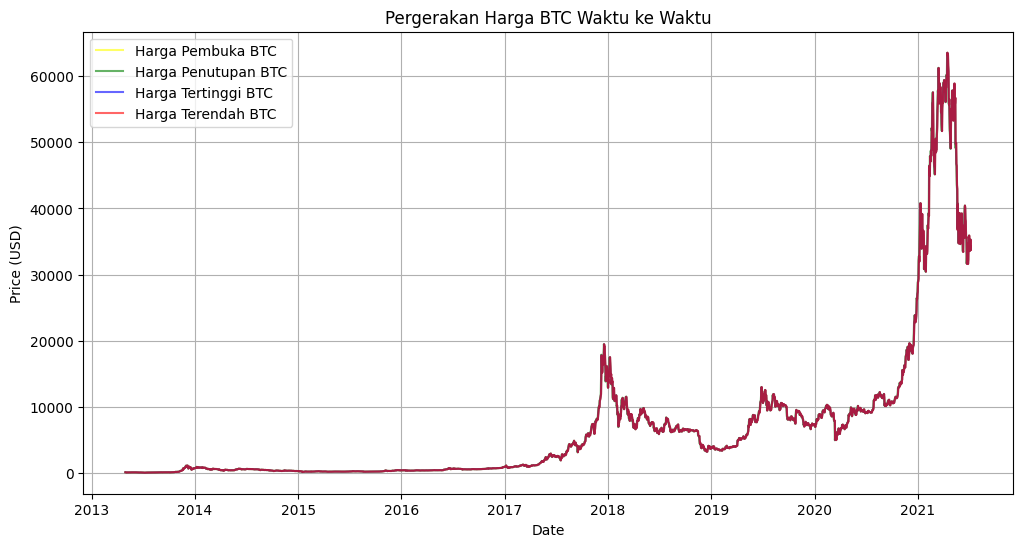

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(BTC['Date'], BTC['Open'], label='Harga Pembuka BTC', color='yellow', alpha = 0.6)
plt.plot(BTC['Date'], BTC['Close'], label='Harga Penutupan BTC', color='Green', alpha = 0.6)
plt.plot(BTC['Date'], BTC['Open'], label='Harga Tertinggi BTC', color='blue', alpha = 0.6)
plt.plot(BTC['Date'], BTC['Open'], label='Harga Terendah BTC', color='red', alpha = 0.6)
plt.title('Pergerakan Harga BTC Waktu ke Waktu')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Dilihat Dari Data Ini Pergerakan Bitcoin dari 4 tahun terakhir yaitu 2018 - 2021 mengalami kenaikan yang sangat pesat.

### Bagaimana Rata - Rata Harga Penutupan Pada jangka Tahunan, Bulanan dan Minggu

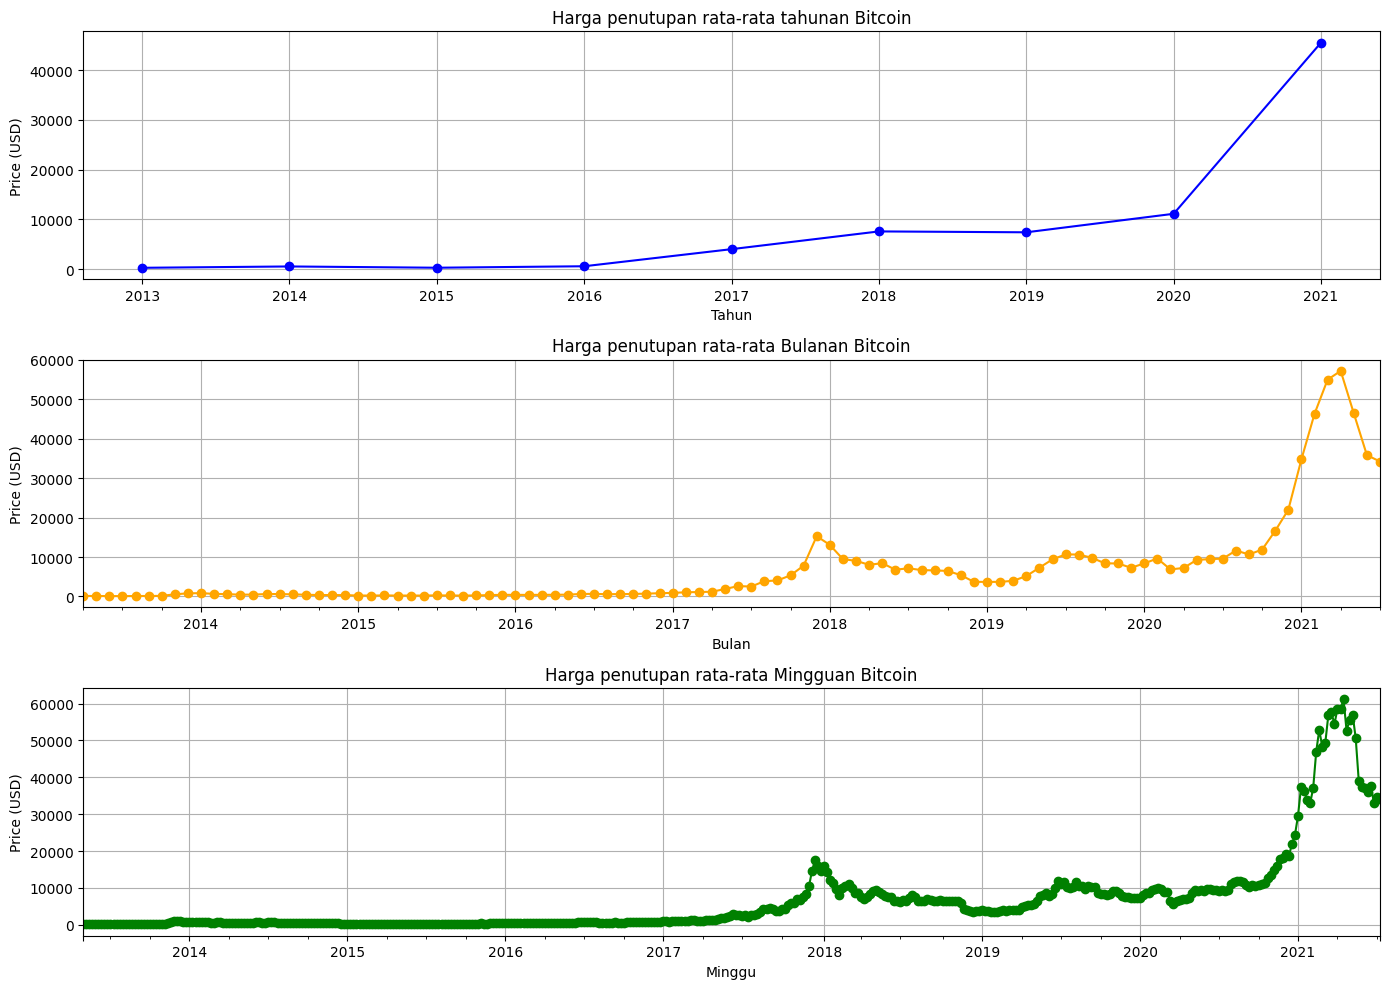

In [24]:
# Convert the 'Date' column to datetime format.
BTC['Date'] = pd.to_datetime(BTC['Date'])

# Calculate the annual average closing price.
BTC['Year'] = BTC['Date'].dt.year
yearly_trend = BTC.groupby('Year')['Close'].mean()

# Calculate the monthly average closing price.
BTC['Month'] = BTC['Date'].dt.to_period('M')
monthly_trend = BTC.groupby('Month')['Close'].mean()

# Calculate the weekly average closing price.
BTC['Week'] = BTC['Date'].dt.to_period('W')
weekly_trend = BTC.groupby('Week')['Close'].mean()


plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
yearly_trend.plot(marker='o', color='blue')
plt.title('Harga penutupan rata-rata tahunan Bitcoin')
plt.xlabel('Tahun')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualize monthly trends
plt.subplot(3, 1, 2)
monthly_trend.plot(marker='o', color='orange')
plt.title('Harga penutupan rata-rata Bulanan Bitcoin')
plt.xlabel('Bulan')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.subplot(3, 1, 3)
weekly_trend.plot(marker='o', color='green')
plt.title('Harga penutupan rata-rata Mingguan Bitcoin')
plt.xlabel('Minggu')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

Dilihat Dari 3 Grafik Di atas Bisa:


*   Pada Grafik Tahunan, Bisa dilihat Kenaikan Nilai Bitcoin dimulai dari tahun 2016 sampai 2021, kenaikan yang dialami terus menerus.
*   Pada Grafik kedua terlihat lonjakan yang cukup tinggi pada bulan 2020 sampai 2021 dan kemudian mengalami koreksi untuk menjaga harga pasa.
*   Pada Grafik ketiga kita bisa melihat dengan jelas bagaimana flukuatifnya harga Bitcoin di pasar, kita bisa melihat dimana bitcoin sempat naik pada tahun 2017 - 2018 dan mengalami koreksi kemudian meningkat lagi pada tahun 2020 - 2021.

Kesimpulan dari grafik ini adalah puncak dari harga BTC atau All Time High nya berada pada maret 2021. dan bisa disimpulkan juga Bitcoin bisa menjadi salah satu pilihan investasi jika dilihat dari grafiknya





## Melihat Korelasi Dari BTC

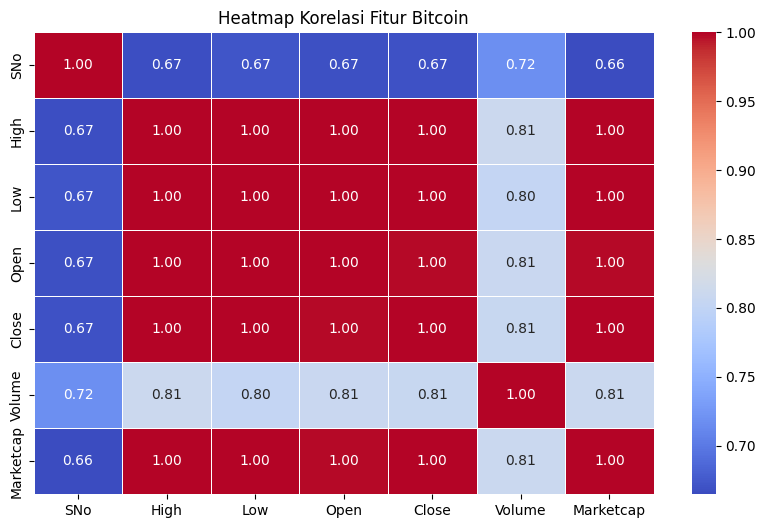

In [ ]:
numerical_features = BTC.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sbn.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Bitcoin')
plt.show()

## Fitur Yang mempengaruhi Harga Bitcoin

Dilihat dari Heatmap di atas, kita bisa melihat bahwa yang memiliki korelasi kuat dengan harga Bitcoin yaitu:


*   Open
*   Low
*   High
*   Marketcap

Jadi untuk menmbuat prediksi dari harga BTC kita bisa menggunakan fitur tersebut menjadi acuannya. dengan targetnya dalah close yaang merupakan harga penutupan dari Bitcoin<br>




## Me

In [29]:
# Pilih fitur dan target
X = BTC[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y = BTC['Close']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

Mean Squared Error (MSE): 15065.236109044139
R-squared (R²) Score: 0.9998463119068502


In [32]:
# Simpan prediksi selama 365 hari
future_prices = []
latest_data = X.iloc[-1:].copy()  # Ambil data terbaru

# Prediksi selama 365 hari ke depan
for i in range(365):
    # Misalkan Volume dan Marketcap terus meningkat
    latest_data['Volume'] *= 1.01  # Naik 1% per hari
    latest_data['Marketcap'] *= 1.005  # Naik 0.5% per hari

    # Prediksi harga BTC
    predicted_price = rf.predict(latest_data[['Open', 'High', 'Low', 'Volume', 'Marketcap']])[0] # Only include the original features for prediction
    future_prices.append(predicted_price)

    # Update latest_data dengan harga prediksi terbaru
    latest_data['Open'] = predicted_price
    latest_data['High'] = predicted_price * 1.01  # Asumsi kenaikan 1% dari harga prediksi
    latest_data['Low'] = predicted_price * 0.99  # Asumsi penurunan 1% dari harga prediksi
    # latest_data['Close'] = predicted_price # Remove this line as 'Close' is not a feature used during training

# Simpan hasil prediksi ke dalam DataFrame
future_df = pd.DataFrame({'Hari': np.arange(1, 366), 'Prediksi Harga BTC': future_prices})

# Menampilkan prediksi untuk 1 tahun mendatang
print(future_df)

     Hari  Prediksi Harga BTC
0       1        34483.832703
1       2        34568.627373
2       3        34642.286209
3       4        34883.417527
4       5        35086.049937
..    ...                 ...
360   361        62444.511763
361   362        62444.511763
362   363        62444.511763
363   364        62444.511763
364   365        62444.511763

[365 rows x 2 columns]
